<br>
<h1 style = "font-size:50px; font-family:Helvetica ; font-weight : normal; color : #fe346e; text-align: center;"> Exploratory Data Analysis</h1>
<h2 style = "font-size:40px; font-family:Helvetica ; font-weight : normal; text-align: center;"> Introduction to Pandas </h2>
<br><br>

<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612126/EDA/dw1xwbh1g2c85izletjs.png' width="200"  style="float:center" align="center"/>

<br>

<div style='padding:15px'>
<a href="https://colab.research.google.com/github/rribeiro-sci/EDA_laboratory/blob/main/2-Data_Visualization.ipynb" target="_blank">
<img alt="Colab" src="https://res.cloudinary.com/djz27k5hg/image/upload/v1637335713/badges/colab-badge_hh0uyl.svg" height="25" style="margin:20px">
</a>

</div> 

In part we will use some python libraries to perfrom some analysis on our data:

* Pandas
* Seaborn and Matplotlib
* Scikit-learn



# Problem Statement

Visululize the relationships between various Healthy and Unhealthy habits to Heart Strokes, and there by predict the stroke probability with best model and hypertuned parameters.


# 1. Data Preprocessing

In this section, loading of data, visulaizing missing values and feature extraction will be carried out. 
In the current dataset, there are 11 features and one binary target. A brief information about the features are given below

1. **id**: Identification number of the individual.
2. **gender**: Gender of the individual.
3. **hypertension**: Health related parameter, does person have hypertension.
4. **heart_disease**: Health related parameter, does person have heart disease.
5. **ever_married**: Personal information, is person married on not?
6. **work_type**: Nature of work place.
7. **Residence_type**: Residence type of the individual.
8. **avg_glucose_level**: average glucose level in blood for the individual.
9. **bmi**: body mass index of the individual.
10. **smoking_status**: Habitual information. Current smoking status of individual.
11. **stroke**: Our taget, is person suffered heart attack?

In [21]:
# import pandas
import pandas as pd

In [22]:
# Load data into a dataframe
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [23]:
# Visualizeing dataframe
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Initial Insights About Dataset

As we can see from the dataframe above that: 

1. Both Categorical and numerical features are present.
    - **Categorical Features**: gender, ever_married, work_type, Residence_type, smoking_status
    - **Binary Numerical Features**: hypertension,heart_disease, stroke
    - **Continous Numerical Features**: age, avg_glucose_level, bmi 
2. Data from bmi feature is missing.
3. Most of the data is categorical which need a special attention to visulaize those
4. Feature extraction can be done by binning the continous features ( age, sugar level, and bmi) and let's keep every things as it is.


### Handling missing values

In [24]:
# Checking the missing values:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [25]:
# Only bmi feature have some missing data,which was be filled with the median of the same column.
df['bmi'] = df['bmi'].fillna(round(df['bmi'].median(), 2))

# 2. Ploting with matplotlib

<br><br>

<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612125/EDA/ltp08qben9ymxdrt5v7s.webp' width="500"  style="float:center" align="center"/>

In [4]:
# setting jupyter plotting parameters
%config InlineBackend.figure_format ='retina'
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

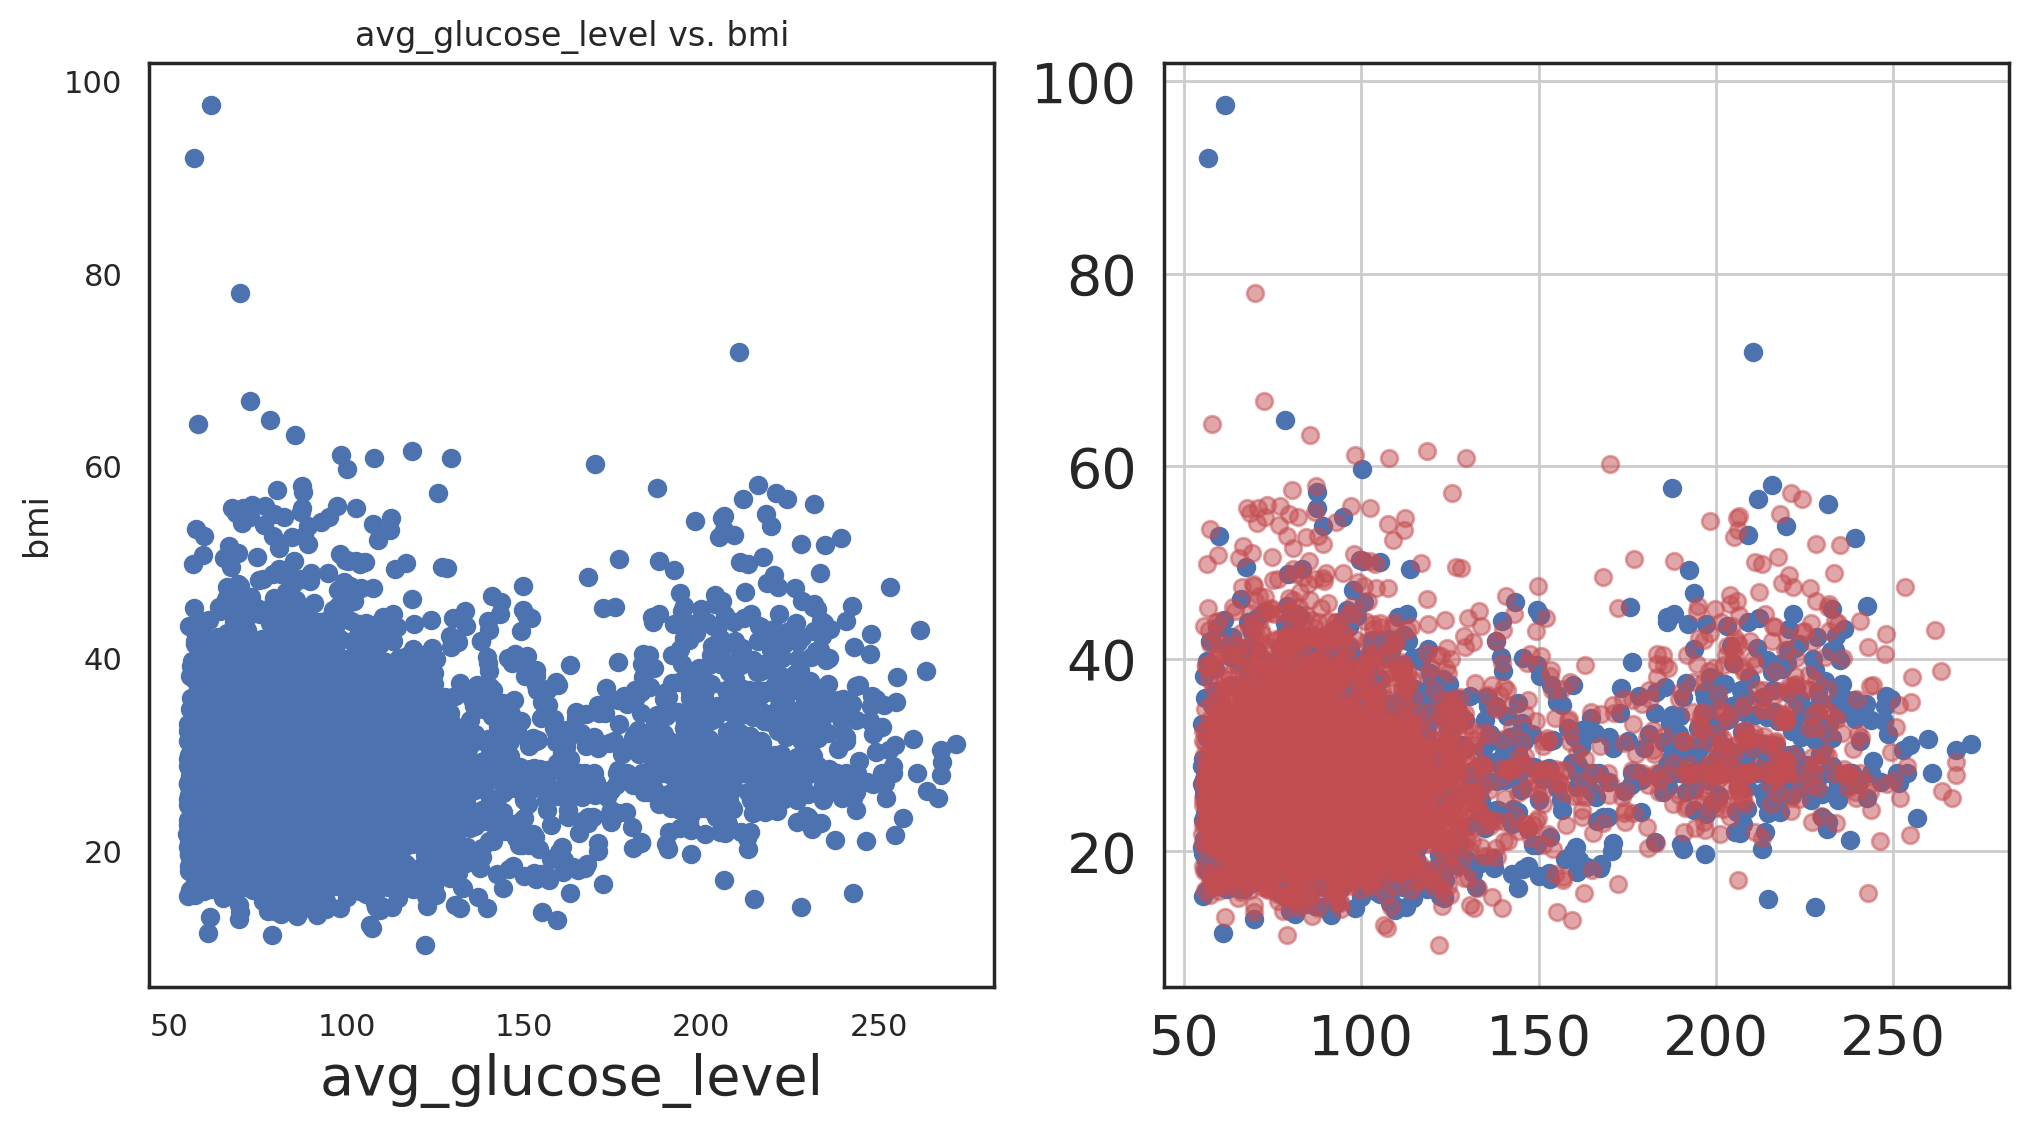

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=[12,6])

X = df.avg_glucose_level
Y = df.bmi

ax[0].scatter(X,Y)

# Styling

ax[0].set_title('avg_glucose_level vs. bmi')
ax[0].set_ylabel('bmi')
ax[0].set_xlabel('avg_glucose_level', fontsize=20)
#ax[0].set_xlim([40,150])
#ax[0].set_ylim([90,700])


# subplot 2
X_male = df[df.gender == 'Male'].avg_glucose_level
Y_male = df[df.gender == 'Male'].bmi
X_female = df[df.gender == 'Female'].avg_glucose_level
Y_female = df[df.gender == 'Female'].bmi

ax[1].scatter(X_male, Y_male, c='b')
ax[1].scatter(X_female, Y_female, c='r', alpha=0.50)

ax[1].grid(True)
ax[1].tick_params(labelsize=20)

plt.show()

# Ploting with matplotlib and seaborn

Seaborn:
* built on top of matplotlib. 
* high-level interface for creating attractive statistical graphics, such as heatmaps, violin plots, pair plots, and more. 
* default aesthetics
* it integrates well with Pandas DataFrames and supports features like color palettes, data aggregation, and statistical estimation

In [6]:
# importing plotting libraries
import seaborn as sns
print(sns.__version__)

0.13.1


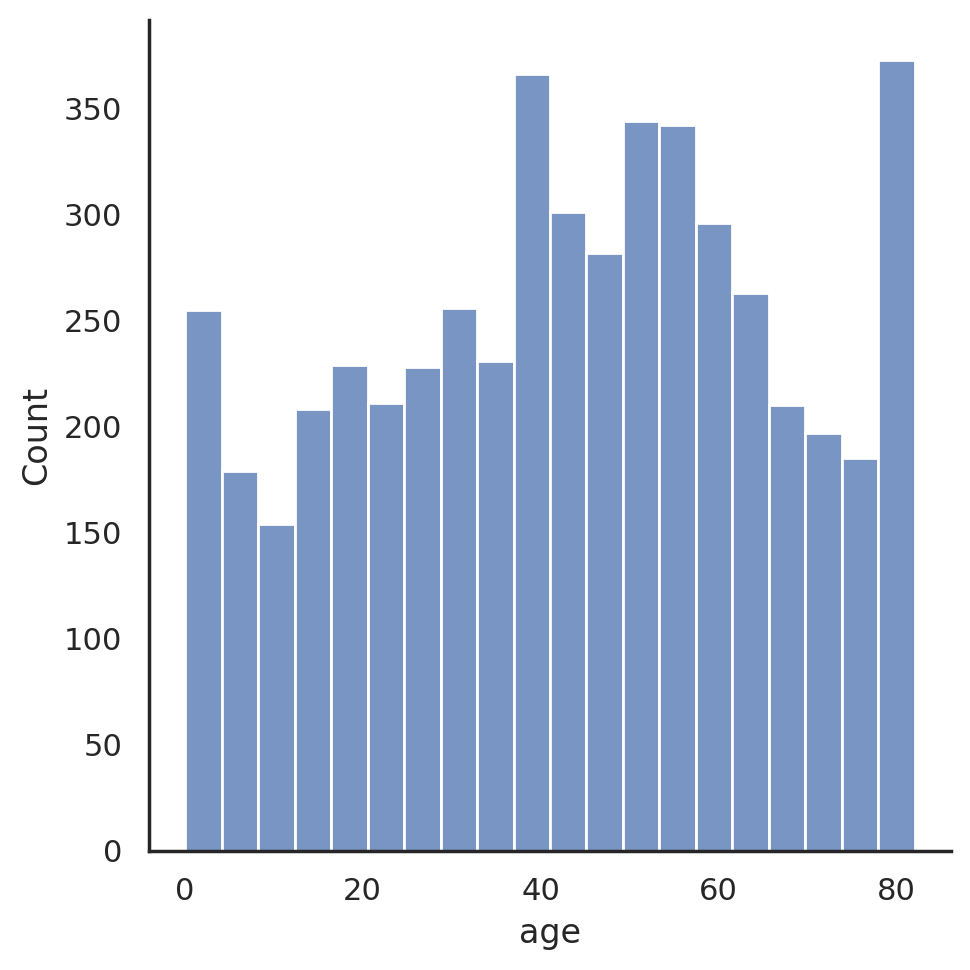

In [35]:
# the simplest and quiquest way
sns.displot(df.age)

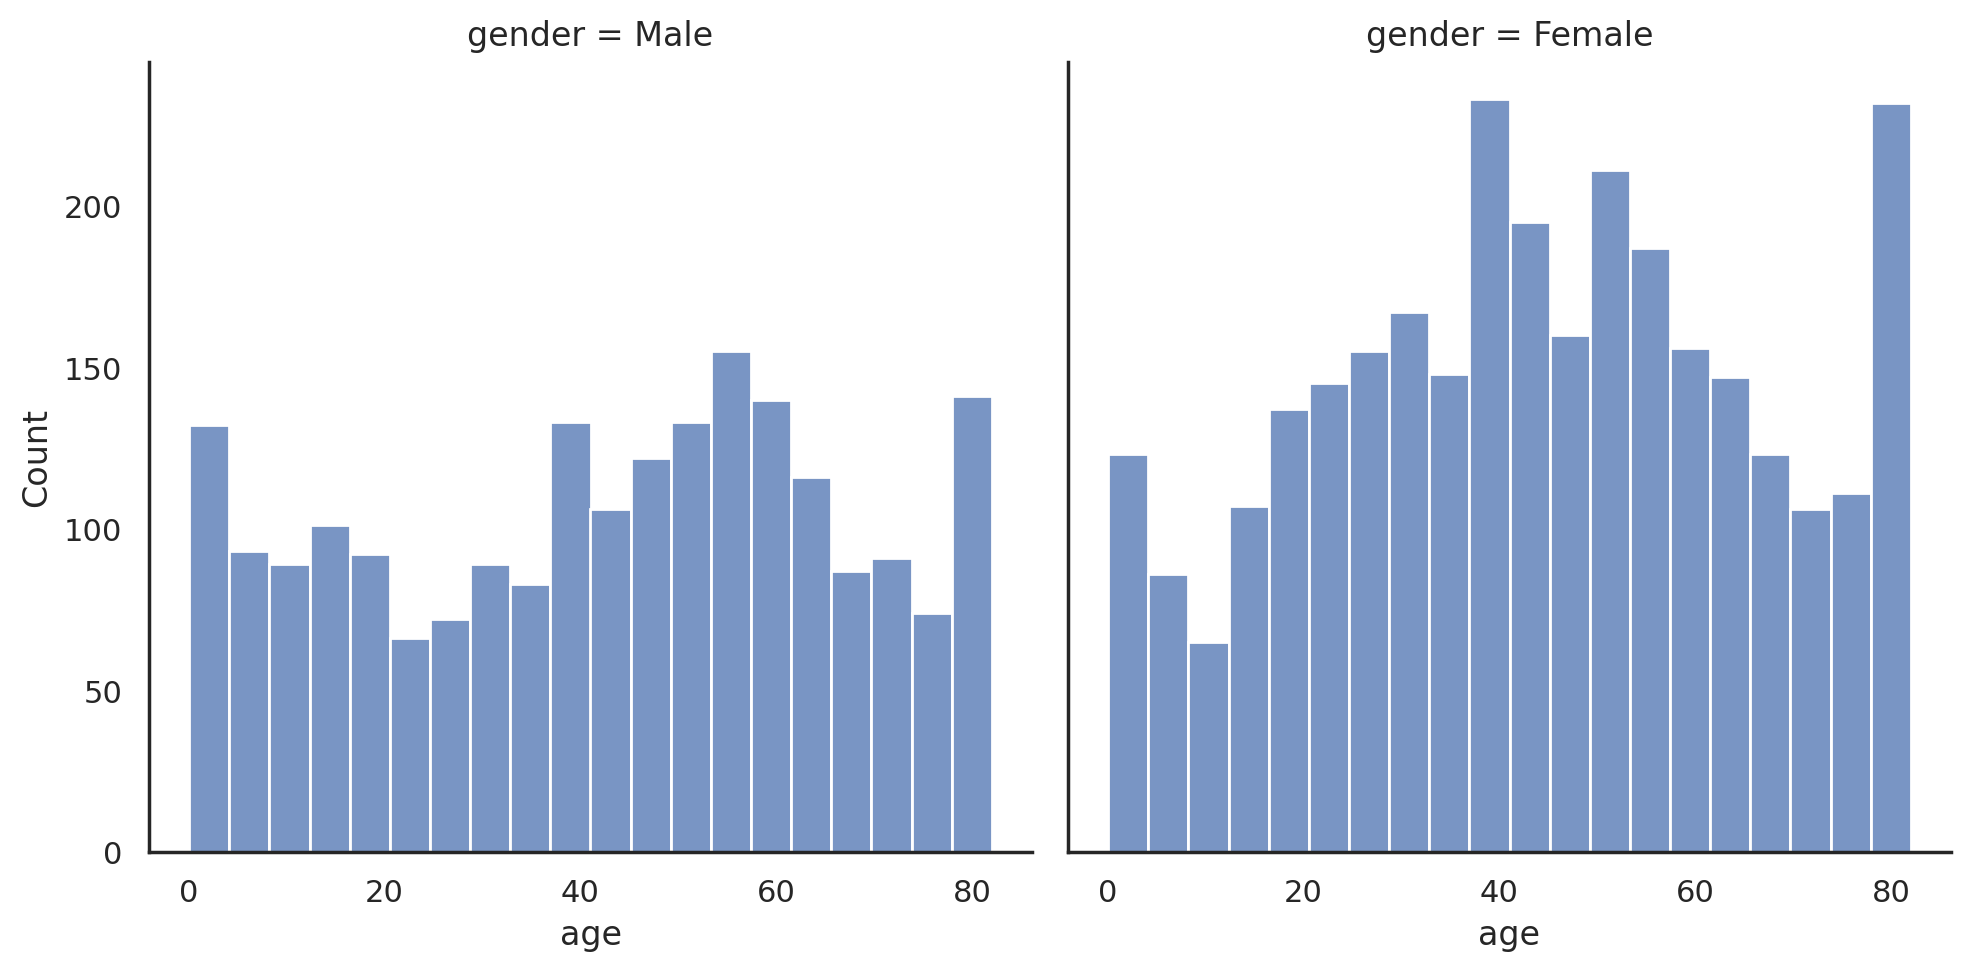

In [39]:
# we can plot distribution of age for both sex
sns.displot(df, x="age", col="gender");


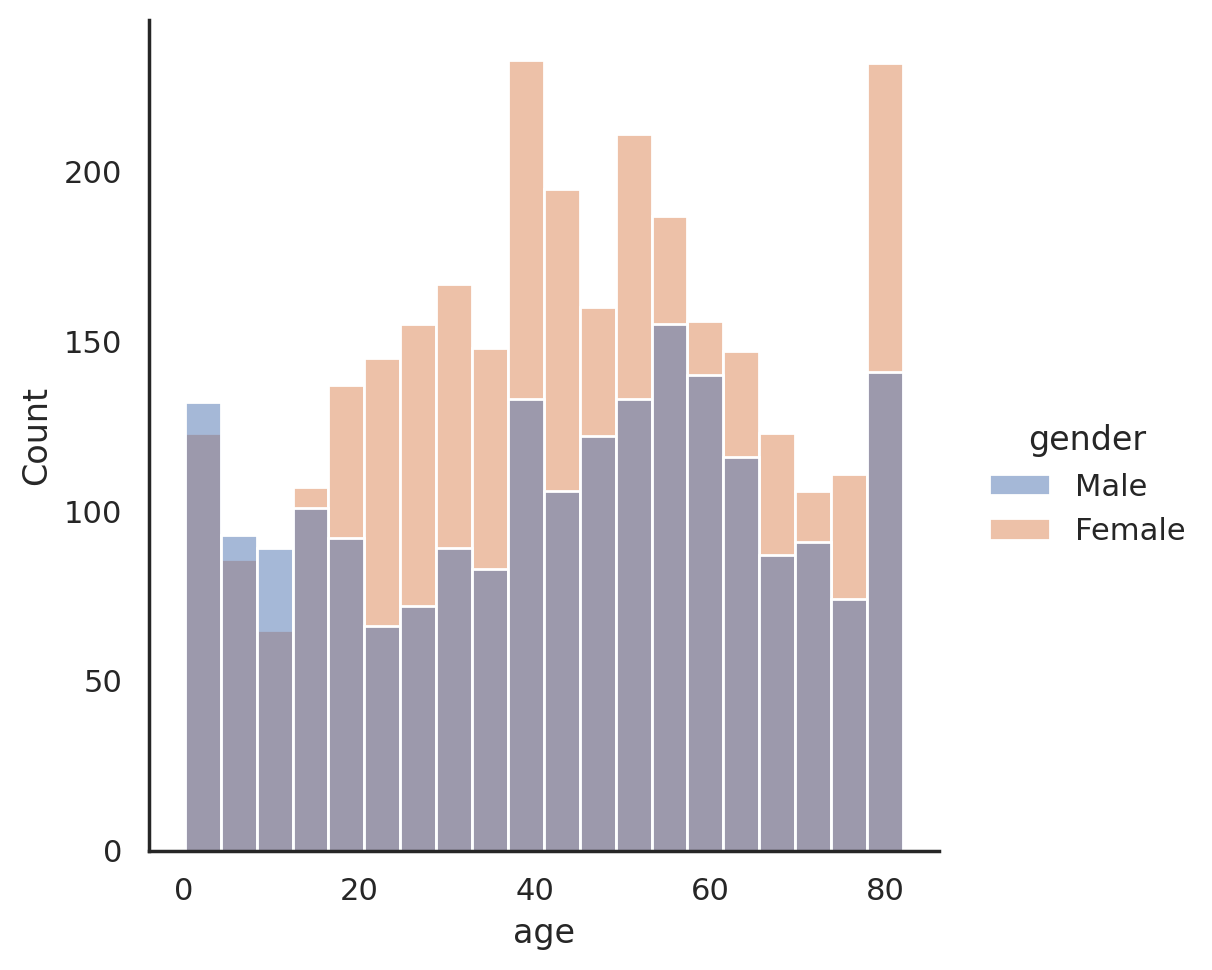

In [40]:
# We can plot distribution of age for all genders in the same plot
sns.displot(df, x='age', hue="gender")


## Make changes in the plot

Seaborn is built on top of matplotblib. Thus we can call matplotlib methods to control all asptects of the plot.



Examples: 

* set title
    - plt.title('My Plot', fontsize = 25)
* set axis labels
    - plt.xlabel('x axis', fontsize = 20)
    - plt.ylabel('y axis', fontsize = 20)
* change size of ticks
    - plt.xticks(fontsize = 20)
    - plt.yticks(fontsize = 20)
    
We can increase the dimentions of the plot passing height and aspect options to the funtion.

Finally, seaborn has some predefined themes we can choose: darkgrid, whitegrid, dark, white, ticks


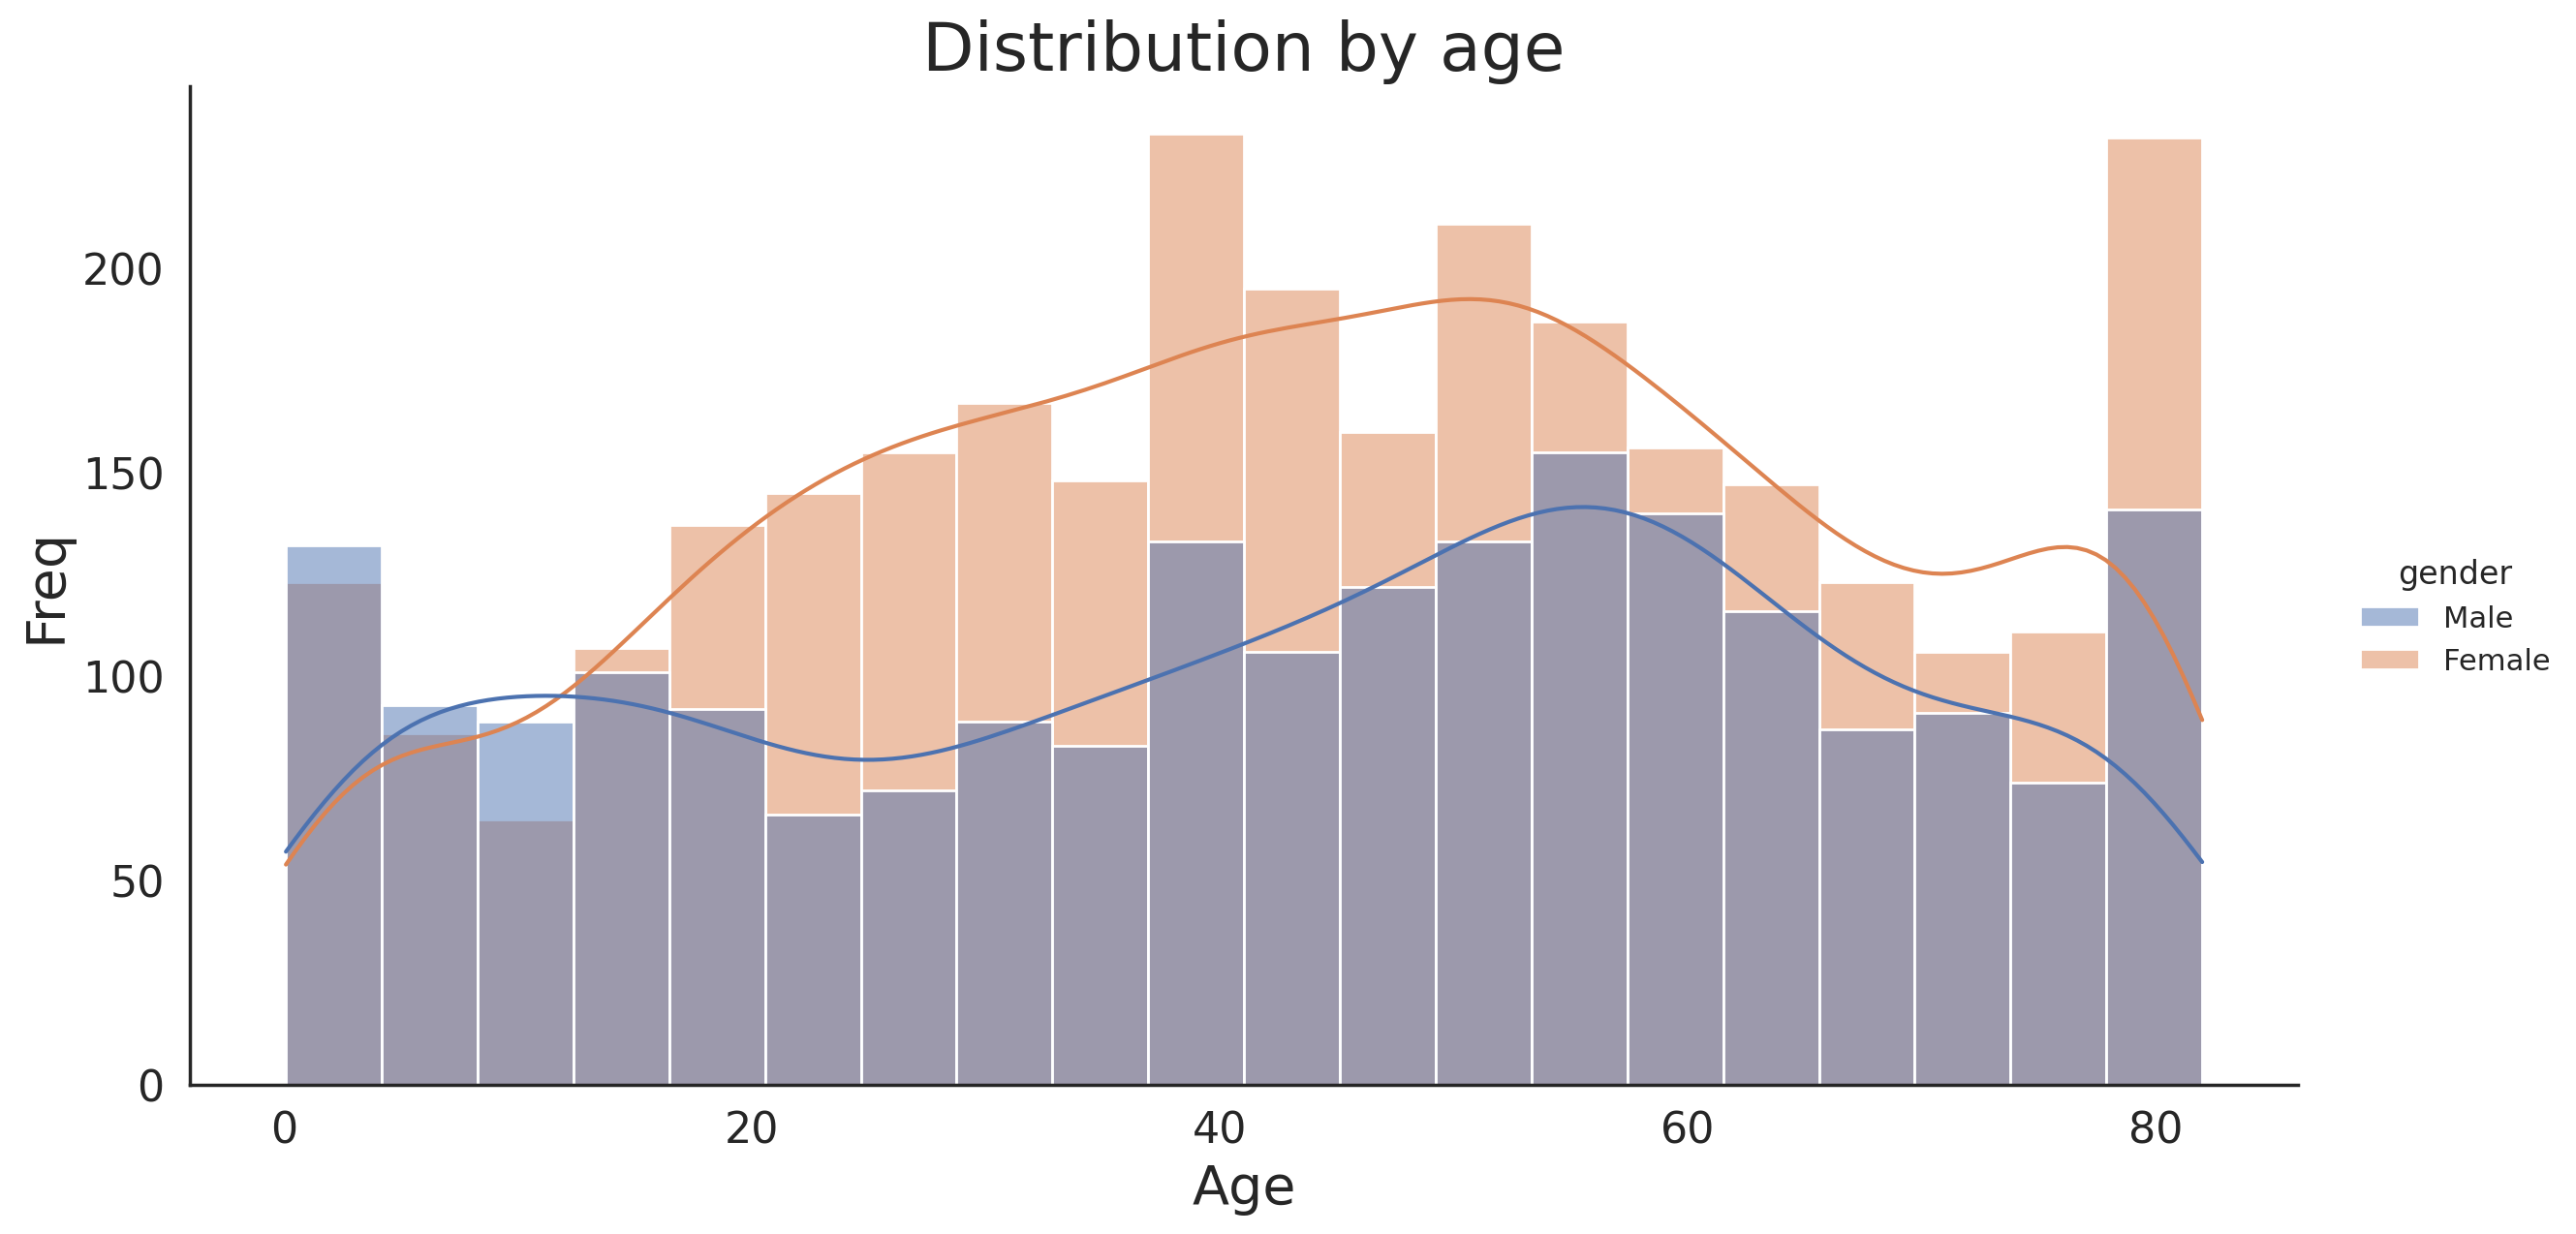

In [41]:
sns.set_theme(style="white")
sns.displot(df, x="age", hue="gender", height=6, aspect=2, legend=True, kde=True)

plt.title('Distribution by age', fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Freq', fontsize=20)
#plt.legend(["Male", 'Female',], title='Sex', fontsize='14', title_fontsize='14', facecolor='white')

plt.show()


# 3. Storyteling with data

##  Has age an impact on strokes? 

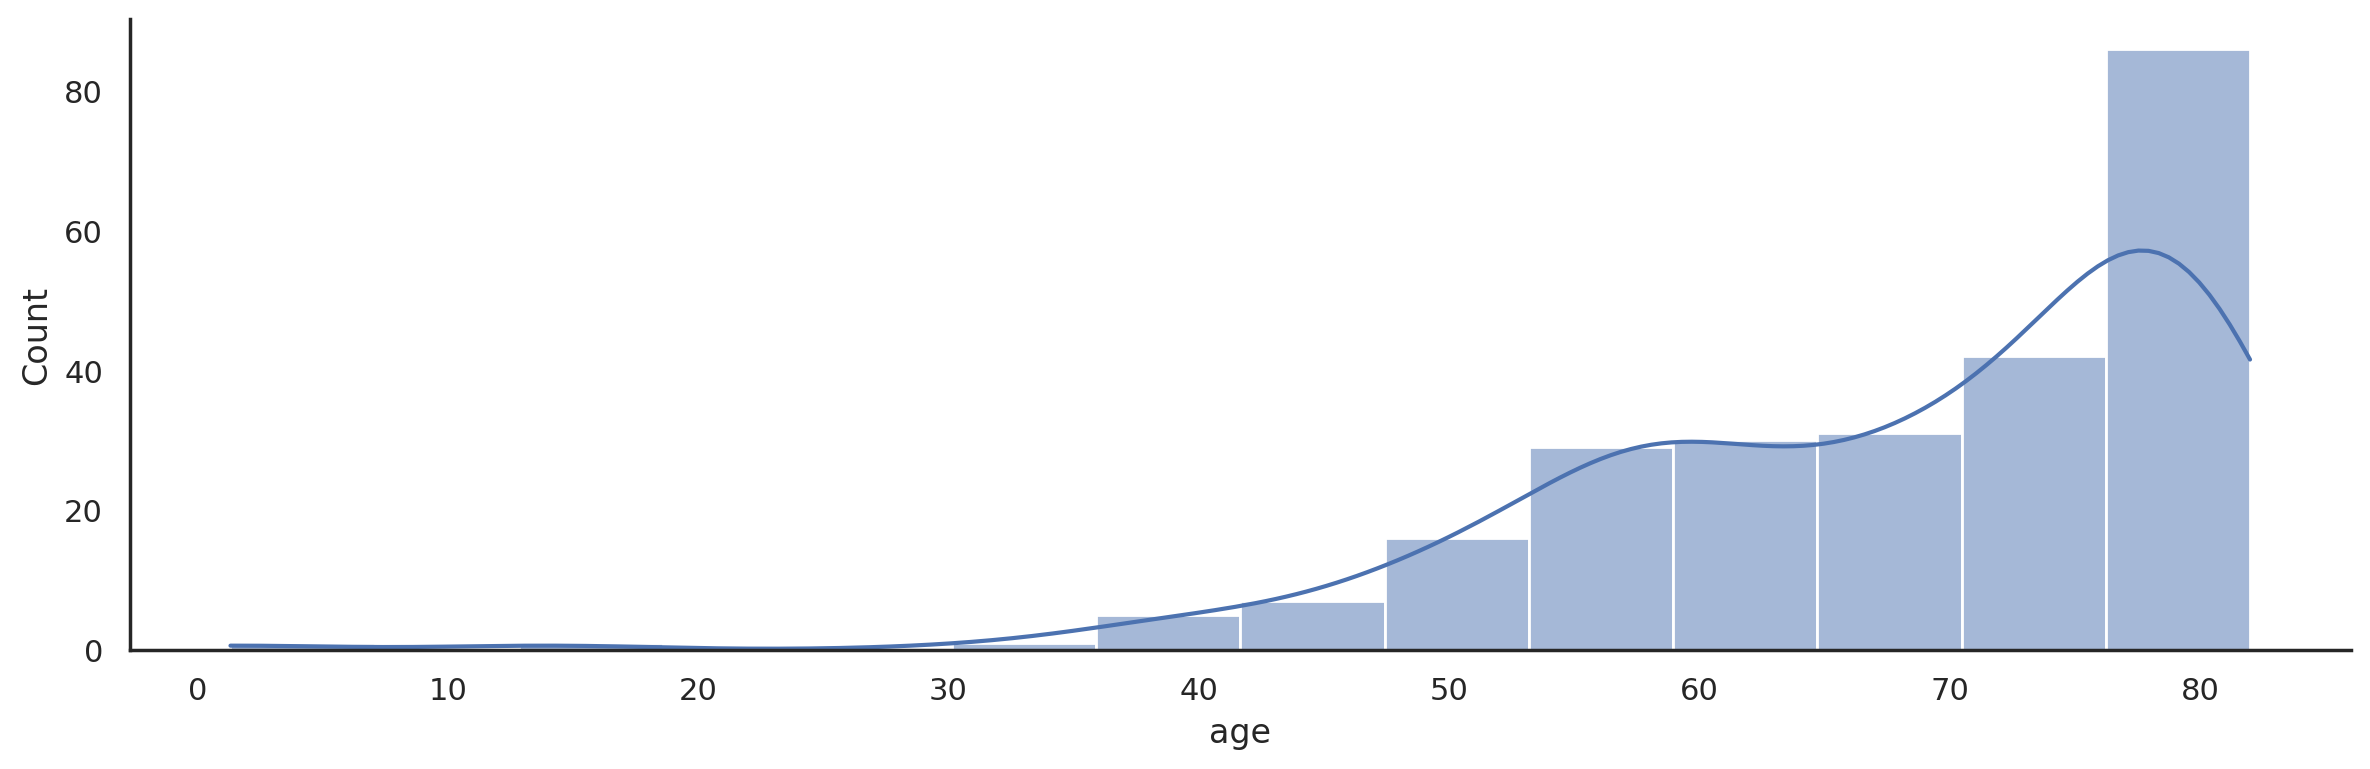

In [45]:
# Heart strokes and Age
sns.displot(df[df.stroke==1], x="age", height=4, aspect=3, legend=True, kde=True)


## And gender?

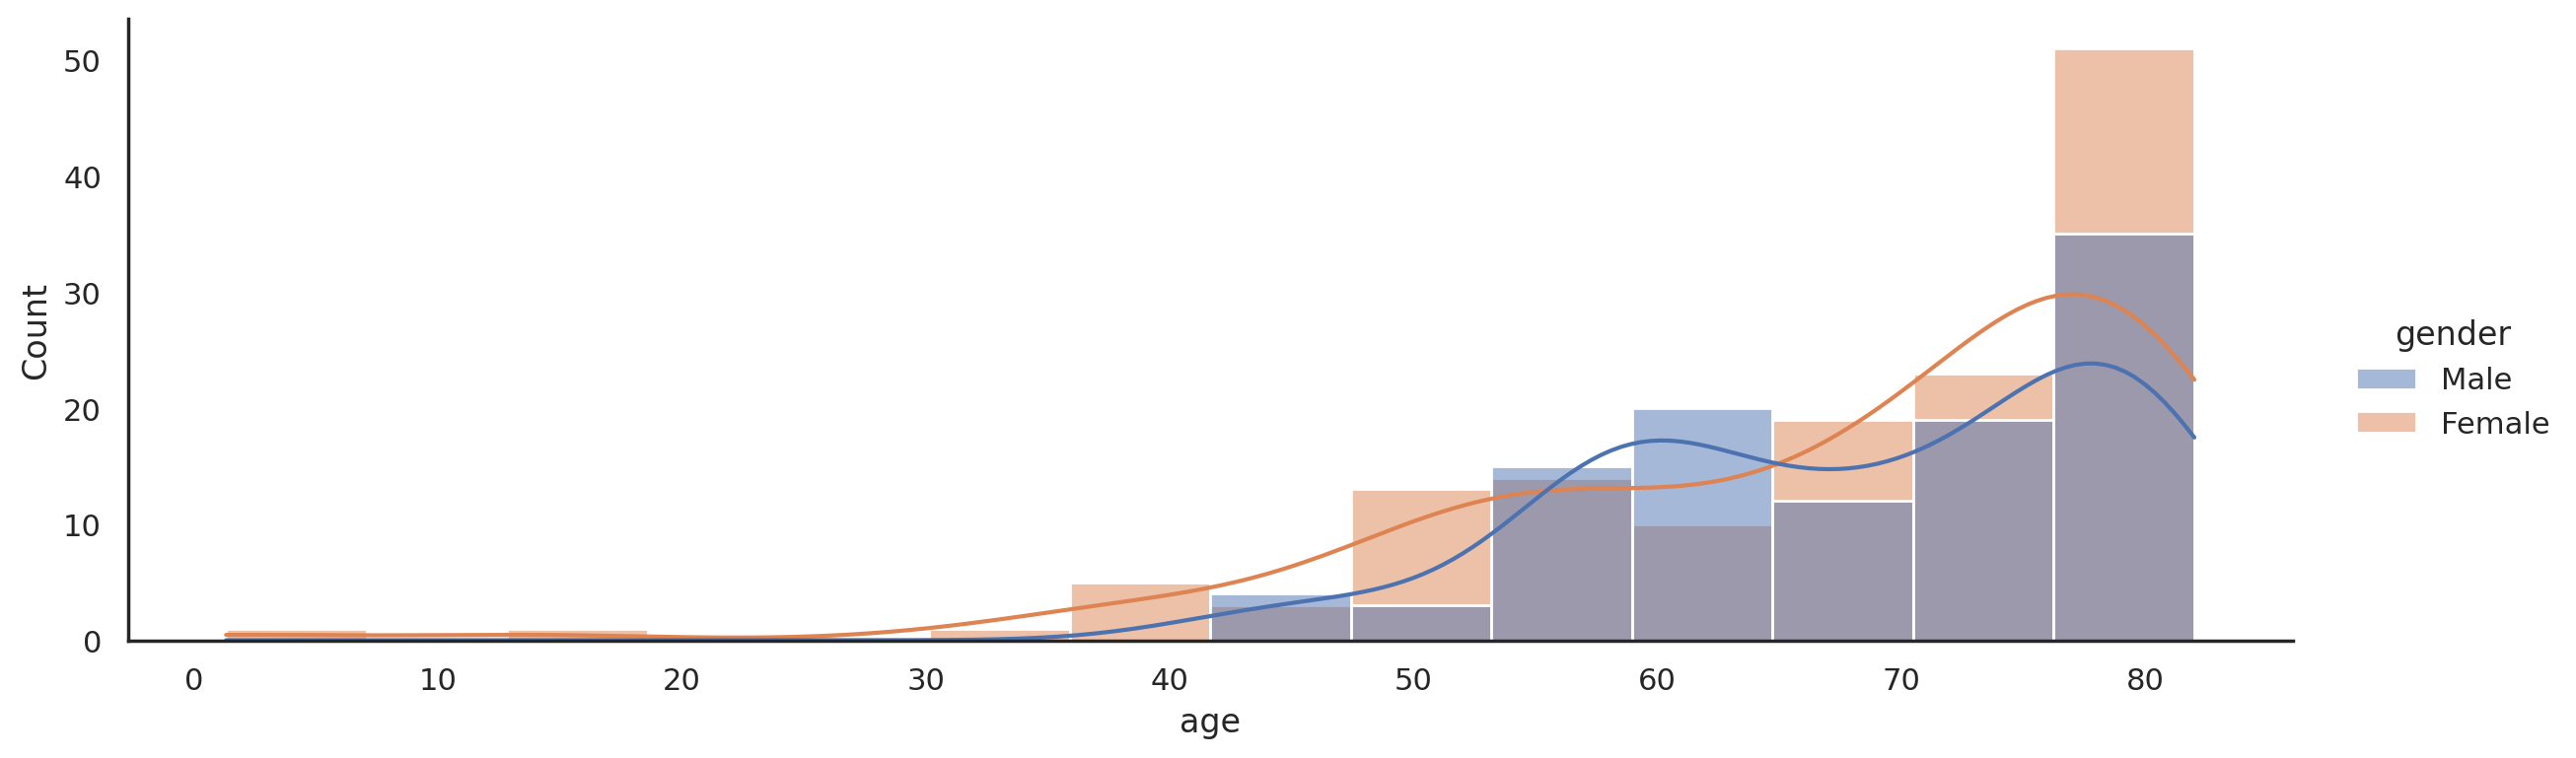

In [47]:
# Heart disease and Age and Gender
sns.displot(df[df.stroke==1], x="age", hue='gender', height=4, aspect=3, legend=True, kde=True)


Age is an important feature. From data it can be seen that old age people are mostly having strokes, compared to younger ones.

## Does body glucose levels in a person, propel a heart stroke?

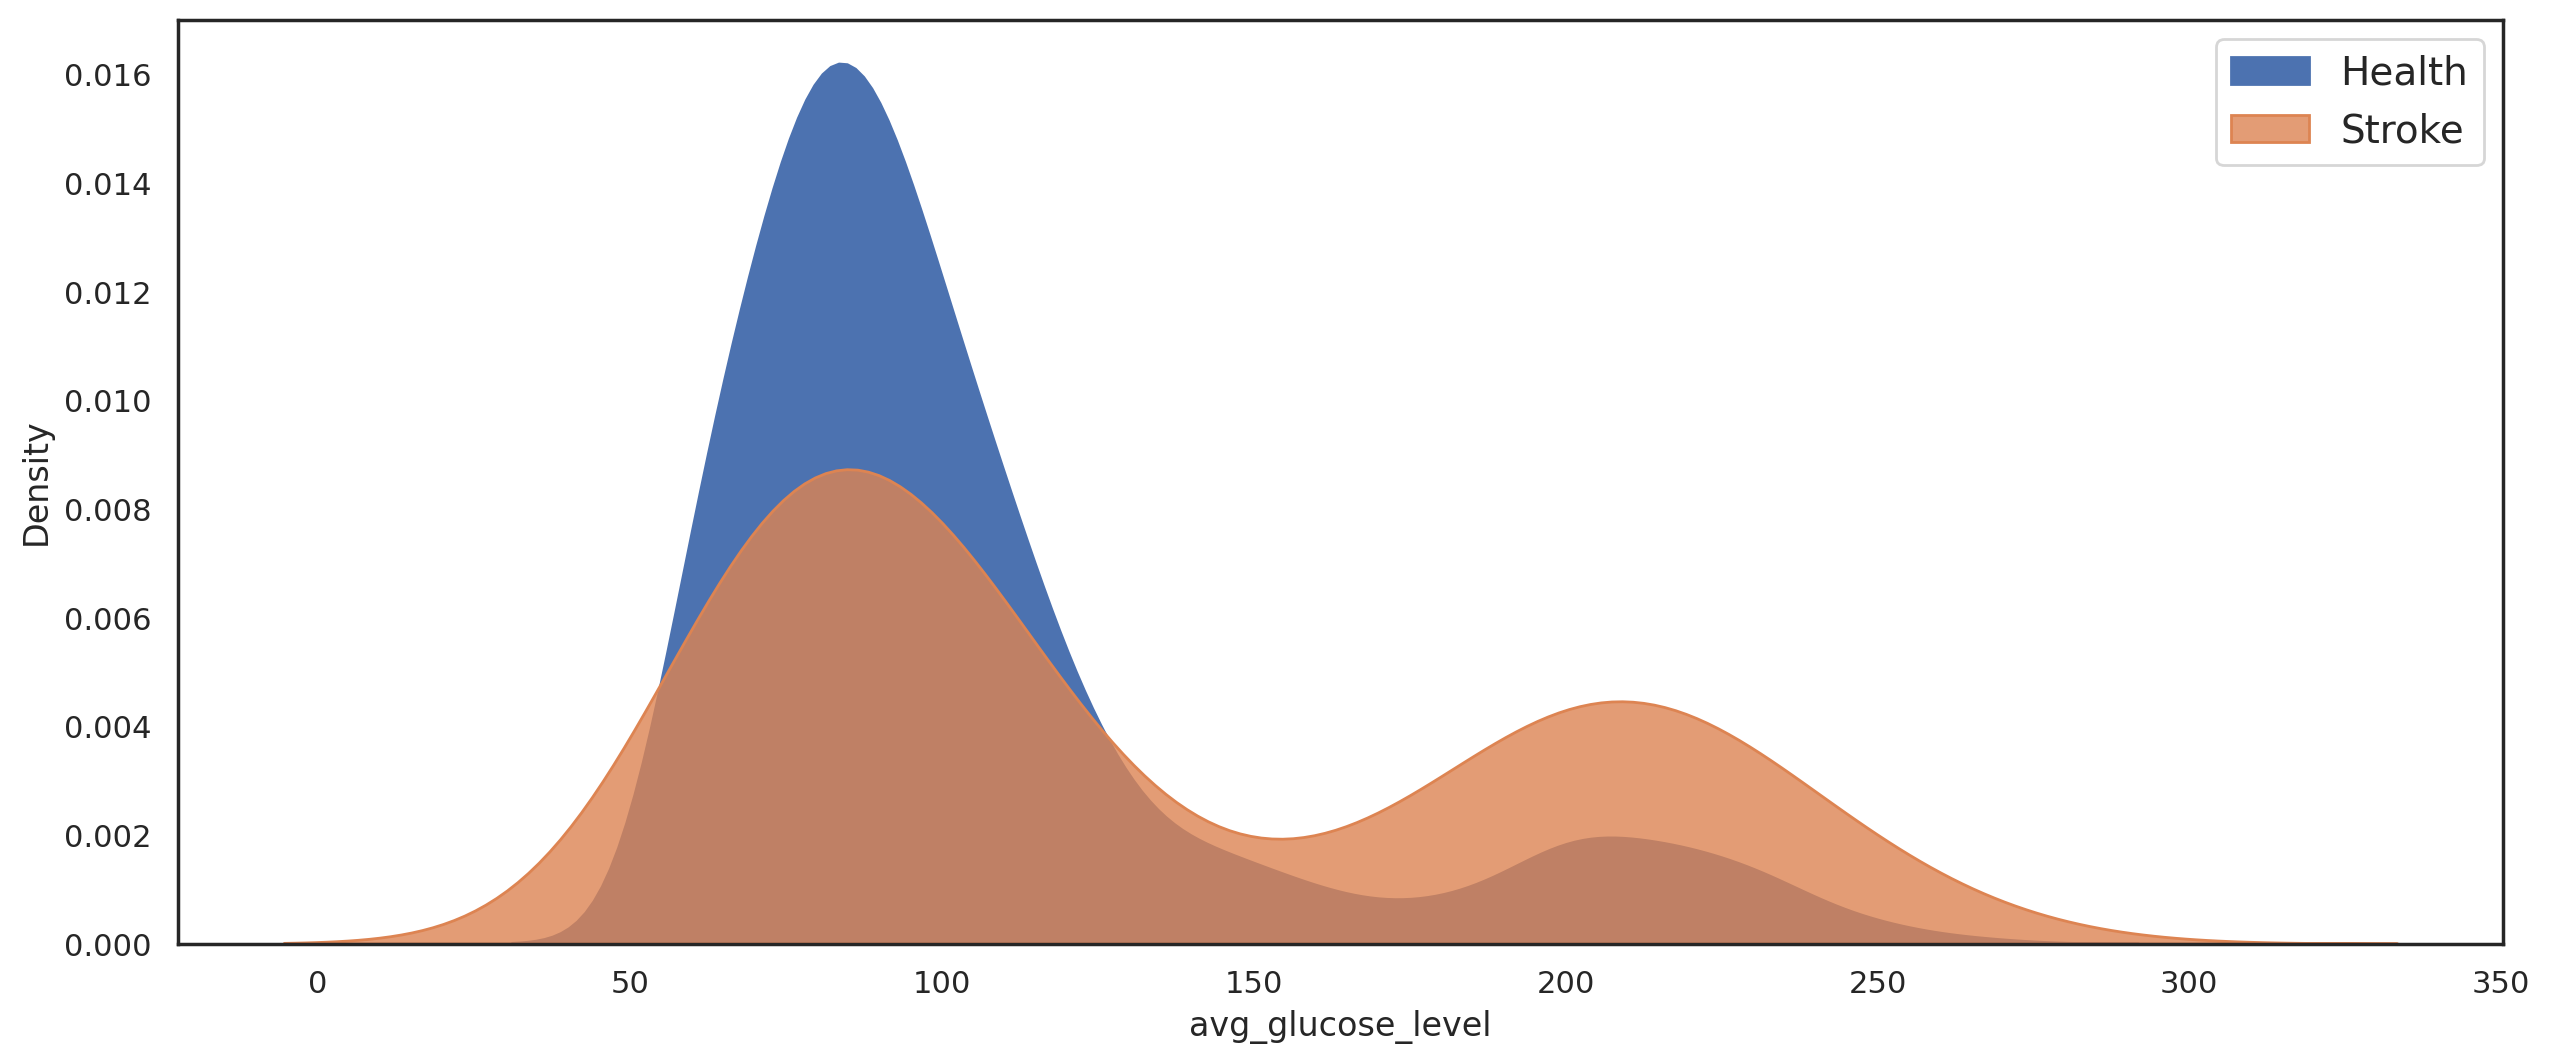

In [49]:
plt.figure(figsize=(15,6))

sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level', shade = True,  alpha = 1, )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level', shade = True,  alpha = 0.8,)
plt.legend(["Health", 'Stroke'], fontsize='14', title_fontsize='14', facecolor='white')

plt.show()

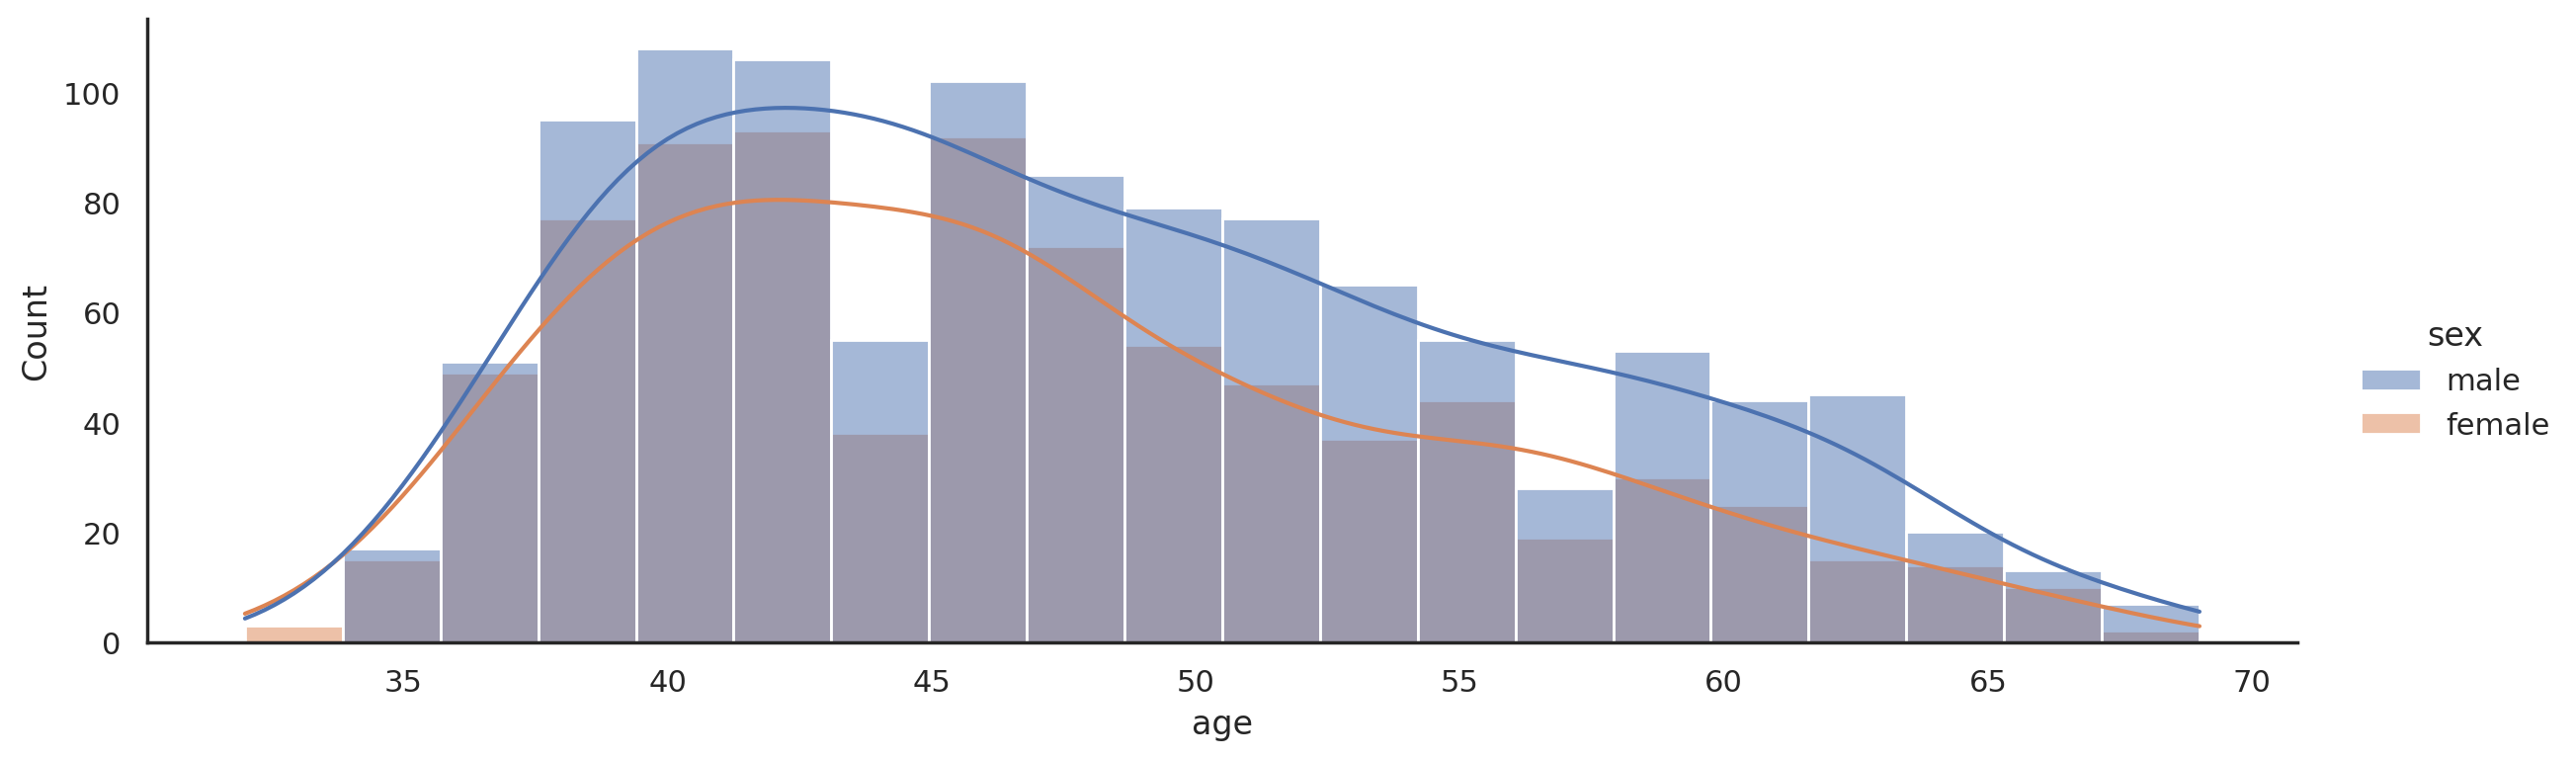

In [12]:
# Heart disease and Age and Gender
sns.displot(df[df.current_smoker=='yes'], x="age", hue='sex', height=4, aspect=3, legend=True, kde=True)


In [52]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Glucose level distribution is skewed towards left and most often strokes can be seen in people with regular glucose levels.


## Analysing Categorical data

Overview of the categorical features shows the value counts of the strokes and no strokes for each categorical feature. This overview could give some insight where strokes are high in number.


###  Can smoking can induce Stroke, is it true?

In [66]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<Axes: xlabel='stroke', ylabel='count'>

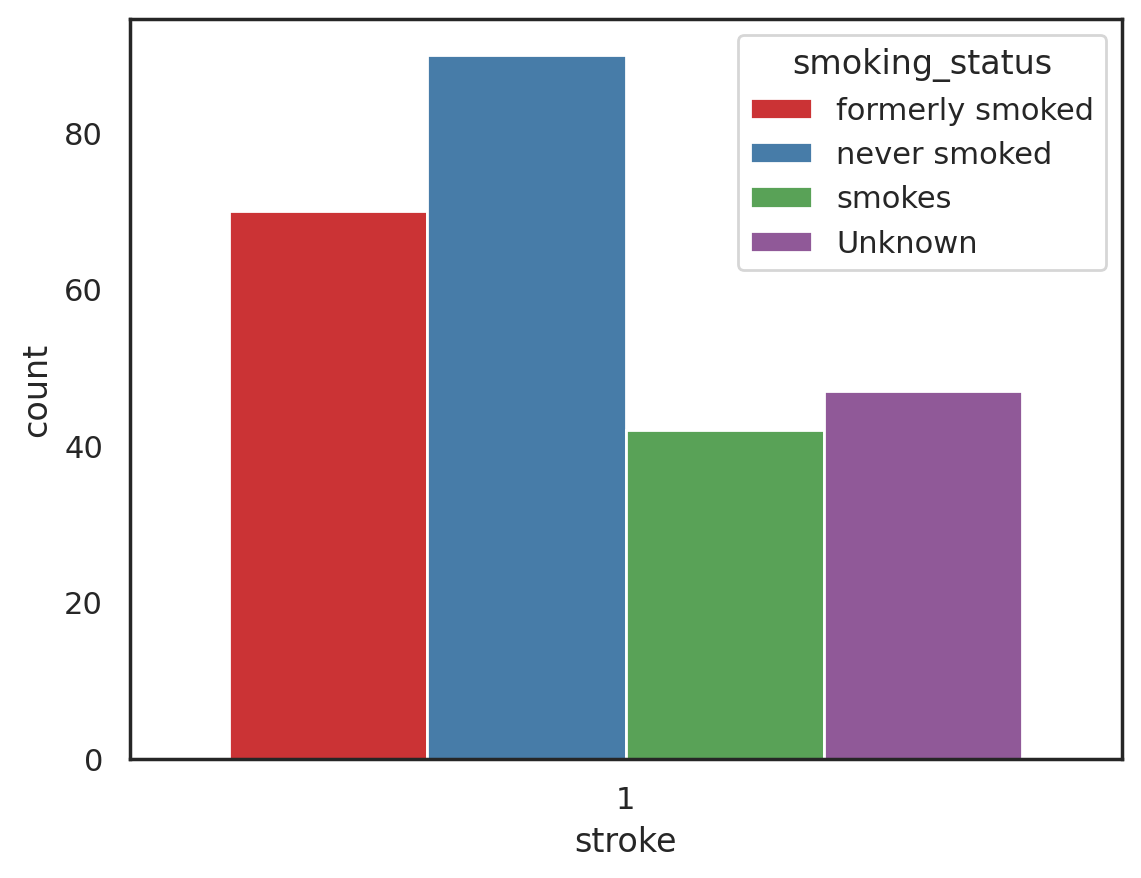

In [77]:
sns.countplot(data=df[df.stroke==1], x='stroke',hue='smoking_status', palette='Set1', )


## Correlation Matrix

To calculate a correlation matrix e need to convert categorical data into numerical data.

In [56]:
smoking_status_dummies = pd.get_dummies(df['smoking_status'], prefix='smoking_status')

# Concatenate the dummy variables with the 'stroke' column
df_encoded = pd.concat([df['stroke'], smoking_status_dummies], axis=1)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

correlation_matrix

,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
stroke,1.000000,-0.055924,0.064683,-0.004163,0.008920
smoking_status_Unknown,-0.055924,1.000000,-0.301028,-0.504695,-0.281249
smoking_status_formerly smoked,0.064683,-0.301028,1.000000,-0.350790,-0.195483
smoking_status_never smoked,-0.004163,-0.504695,-0.350790,1.000000,-0.327742
smoking_status_smokes,0.008920,-0.281249,-0.195483,-0.327742,1.000000


<Axes: >

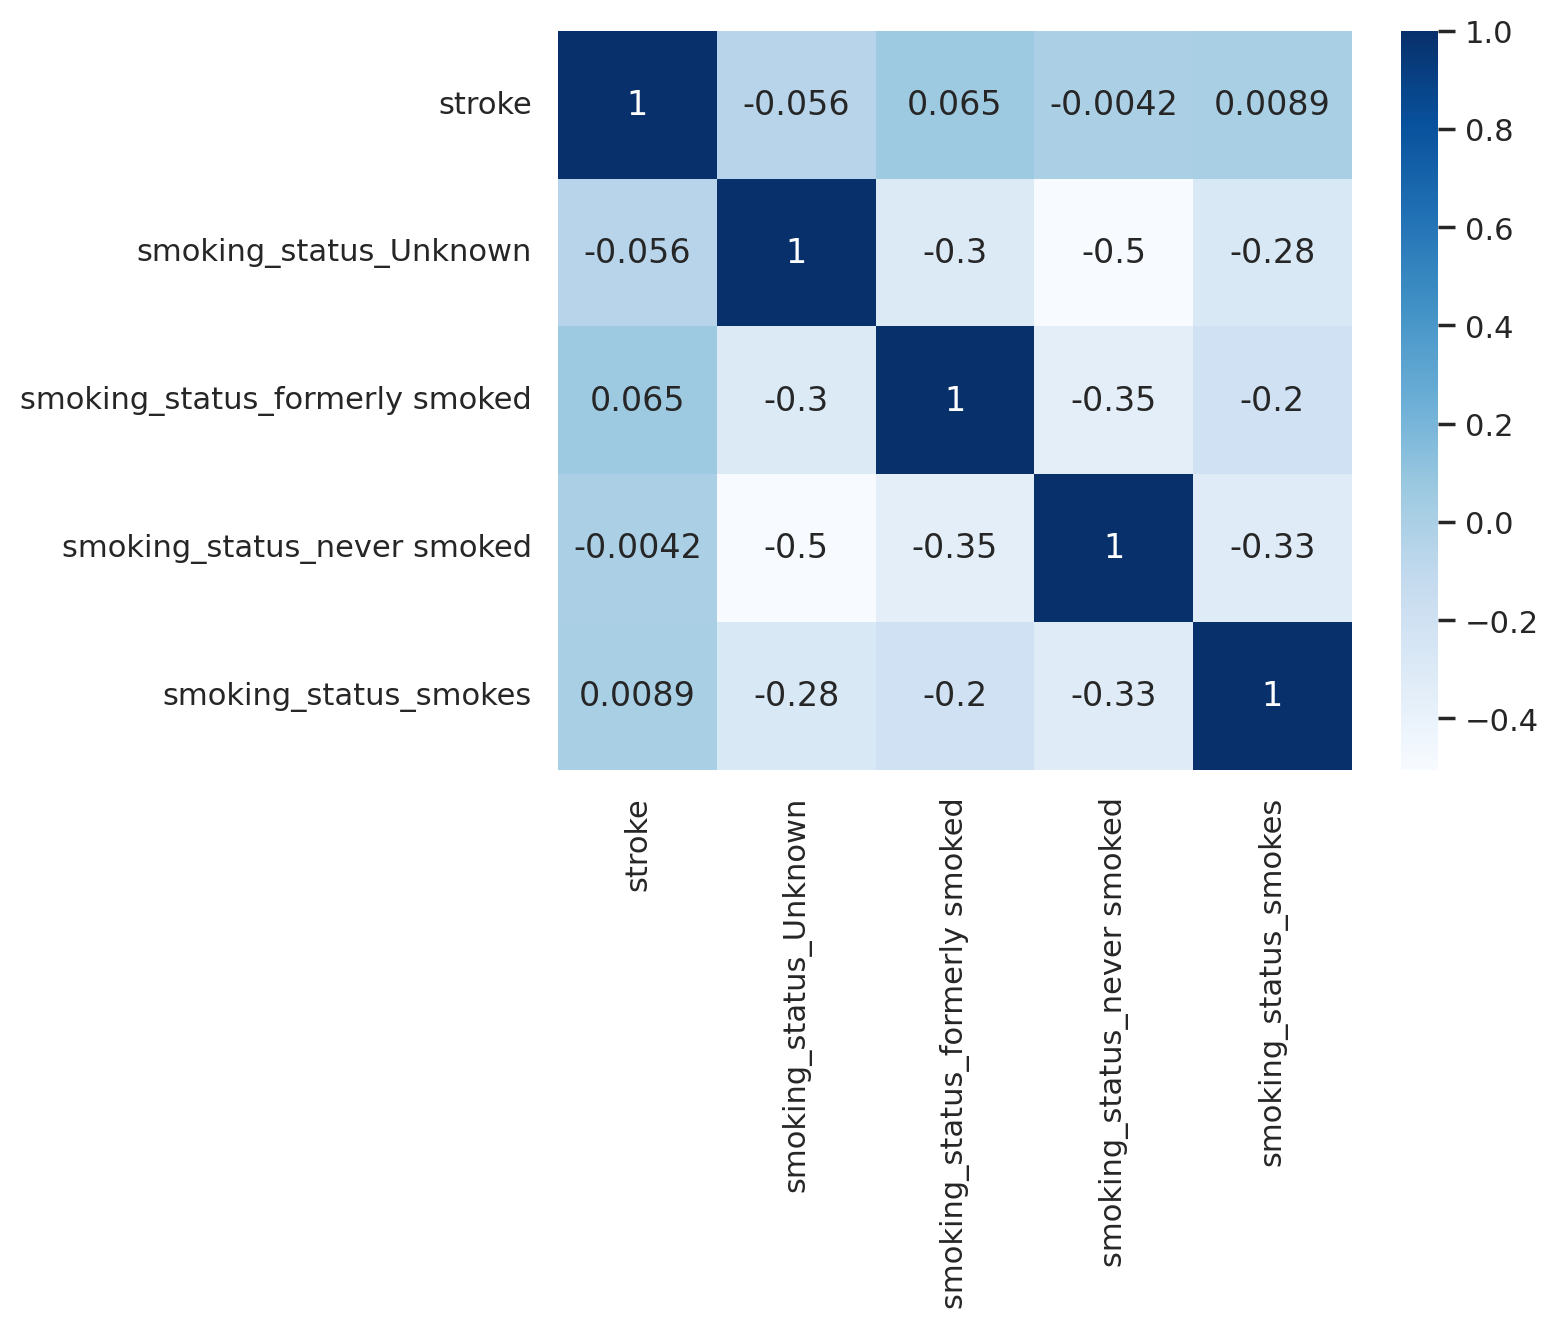

In [104]:
#Visualize correlation matrix with heat map
sns.heatmap(correlation_matrix ,annot=True, cmap=plt.cm.Blues)

## Try yourself:  

1. Does body mass index levels in a person propel a heart stroke?